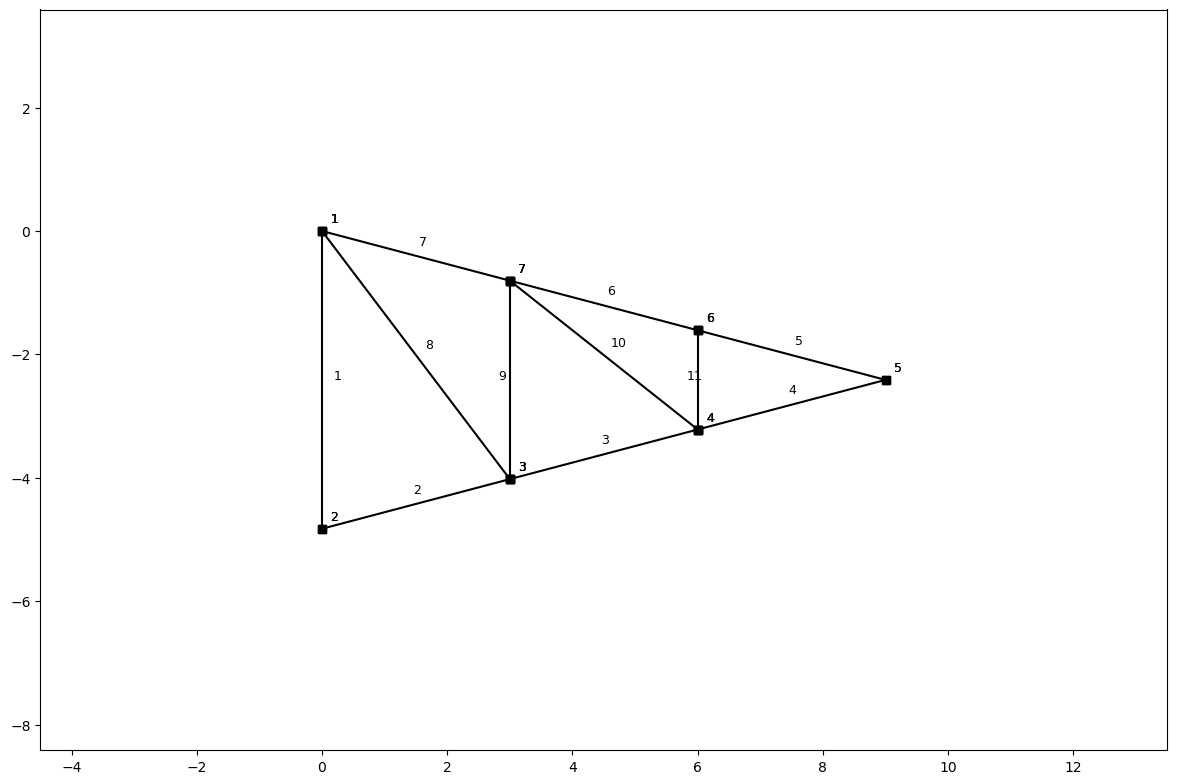

In [6]:
from math import *

#lets import the systemElemnts from the anastruct library
from anastruct import *
#instatiate the SystemElement object
ss = SystemElements()

θ = radians(15)

# Tuple of coordinates
A,B,C,D,E,F,G = [0,0],[0,-18*tan(θ)],[3,-3*tan(θ)],[3,-15*tan(θ)],[6,-6*tan(θ)],[6,-12*tan(θ)],[9,-9*tan(θ)]
#lets add truss members at node using add_truss_element method and passing coordinate loaction as argument to 
#define length of each member
ss.add_truss_element(location=[A, B])
ss.add_truss_element(location=[B, D])
ss.add_truss_element(location=[D, F]) 
ss.add_truss_element(location=[F, G])
ss.add_truss_element(location=[G, E])
ss.add_truss_element(location=[E, C])
ss.add_truss_element(location=[C, A])
ss.add_truss_element(location=[A, D])
ss.add_truss_element(location=[D, C])

ss.add_truss_element(location=[C, F])
ss.add_truss_element(location=[F, E])

#this method plot our assemble structure
ss.show_structure()

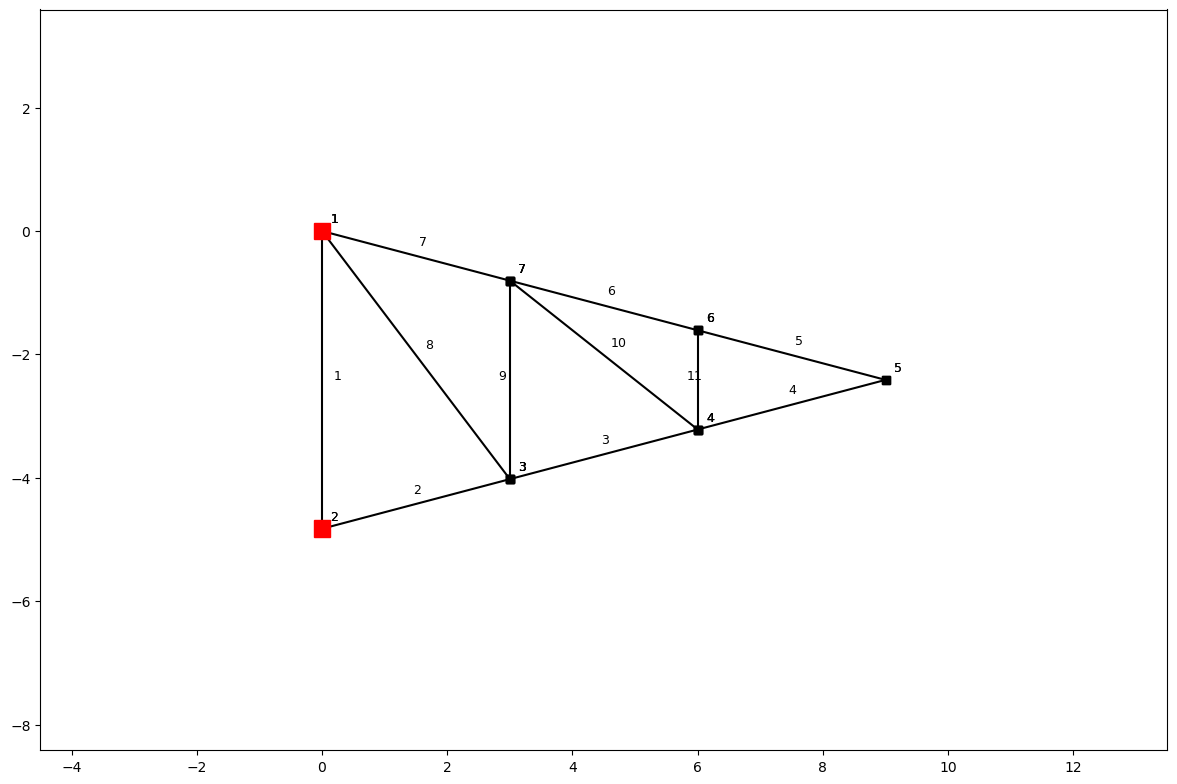

In [7]:
# Add support condition
#the add_support_hinged function is used to specify hinge support
#the node_id argument is the nodal position at which the  support is placed which is an interger
ss.add_support_fixed(node_id = 1) 
#the add_support_roll method is used to specify roller support
ss.add_support_fixed(node_id = 2)

ss.show_structure()

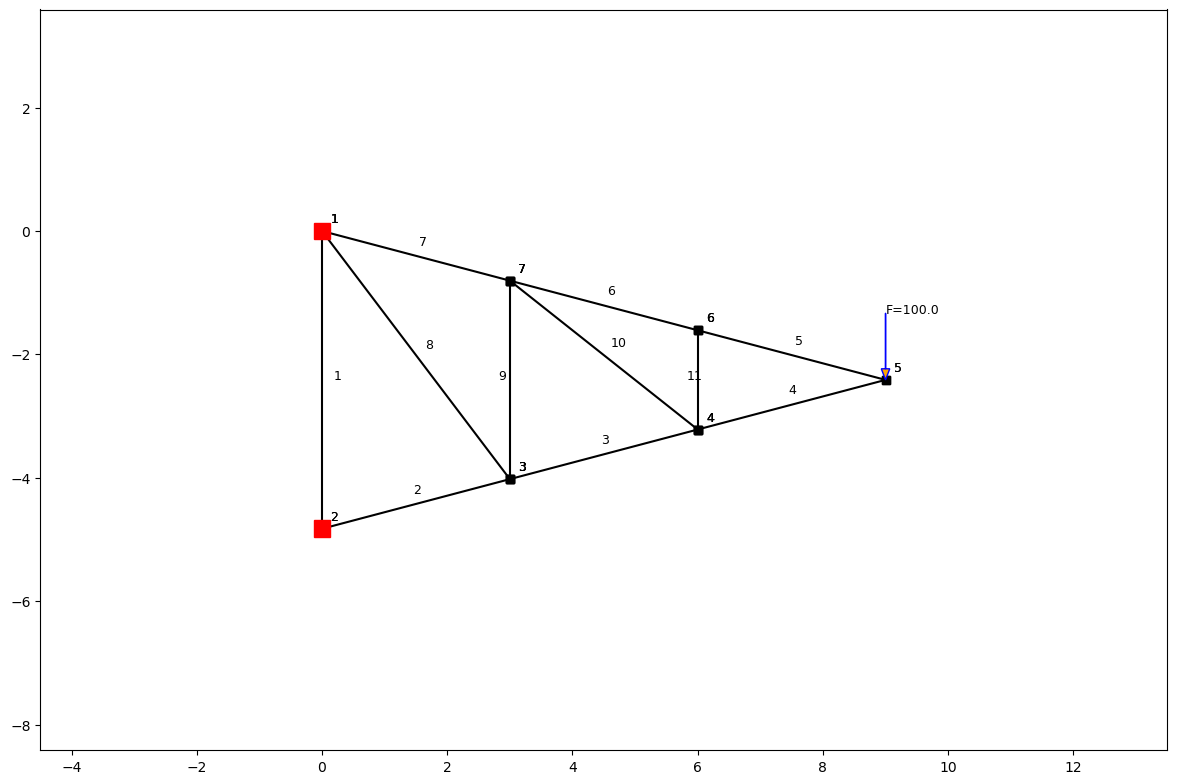

In [9]:
ss.point_load(node_id=5, Fy =-100)
ss.show_structure()

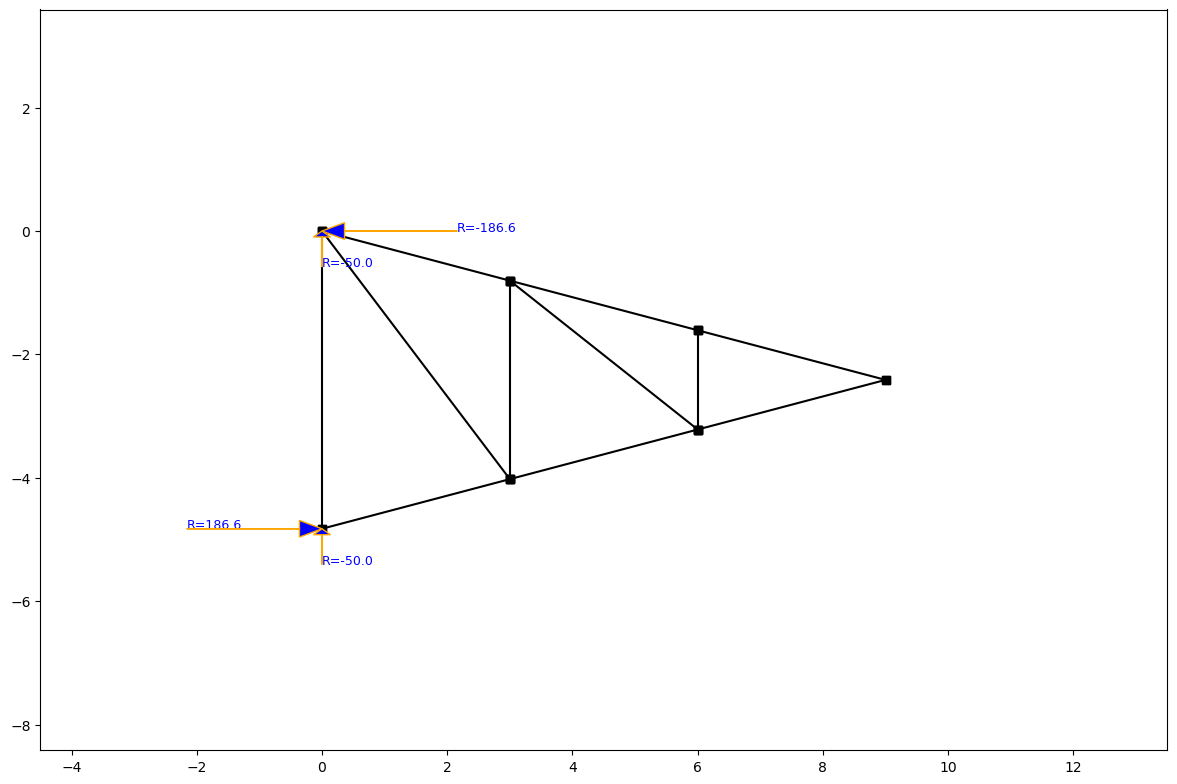

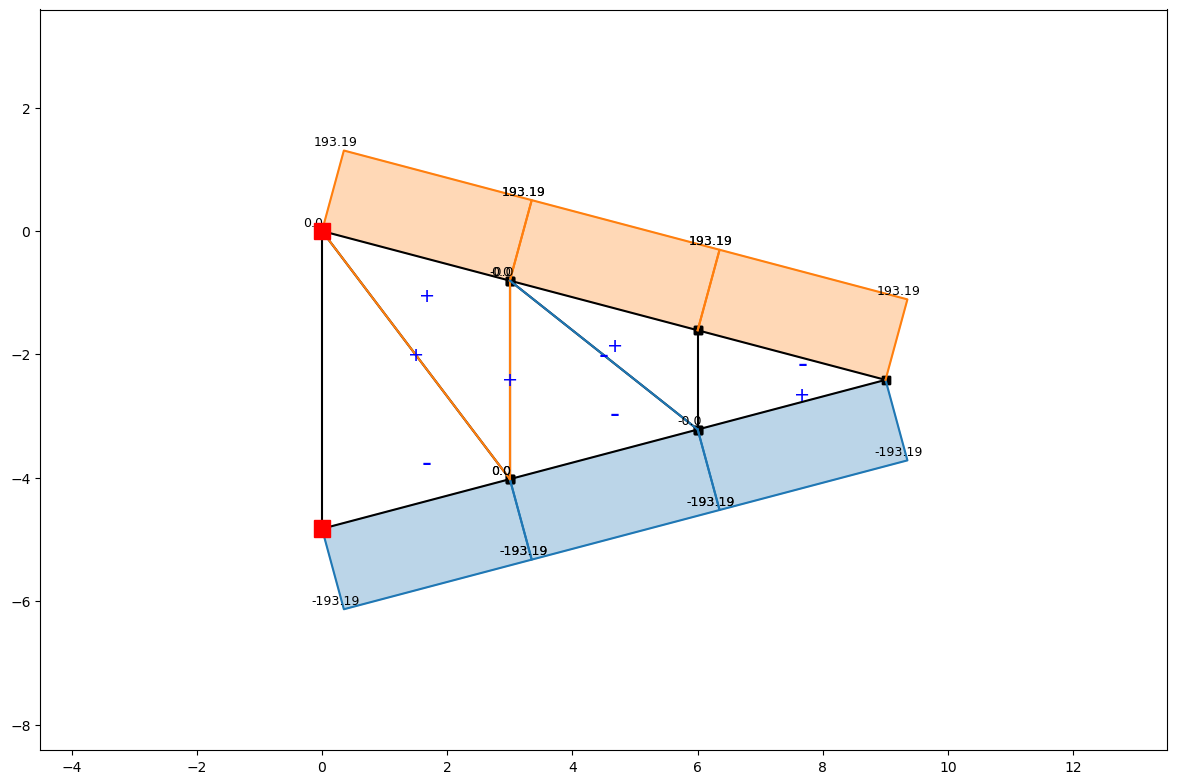

In [11]:
ss.solve()
ss.show_reaction_force()
ss.show_axial_force()

In [12]:
import pandas as pd
df = pd.DataFrame(ss.get_element_results())

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df[['id', 'length','Nmax']]

,id,length,Nmax
0,1,4.82,0.00
1,2,3.11,-193.19
2,3,3.11,-193.19
3,4,3.11,-193.19
4,5,3.11,193.19
5,6,3.11,193.19
6,7,3.11,193.19
7,8,5.02,0.00
8,9,3.22,0.00
9,10,3.85,-0.00
